In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
df = pd.read_csv("Data/BreastCancer.csv")
# (a) Find which attributes should be trivially excluded for classification
# Remove the 'Id' column as it is an identifier
df_cleaned = df.drop(columns=['Id'])

# (b) Data Cleaning (handle missing values, encode categorical data if any, etc.)
# Check for missing values in the dataset
missing_values = df_cleaned.isnull().sum()
# print("Missing Values:\n", missing_values)

# Handle missing values by filling them with the median of each column
numeric_columns = df_cleaned.select_dtypes(include=['number']).columns
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].fillna(df_cleaned[numeric_columns].median())

# Check if there are any remaining missing values after cleaning
missing_values_after_cleaning = df_cleaned.isnull().sum()
print("Missing Values After Cleaning:\n", missing_values_after_cleaning)

Missing Values After Cleaning:
 Unnamed: 0         0
Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64


In [4]:
# (c) Divide the data into Training Set (70%) and Test Set (30%) using Stratified Sampling
X = df_cleaned.drop(columns=['Class'])  # Features
y = df_cleaned['Class']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=41)


In [5]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(
    steps=[
        ("model", SVC(kernel='linear', gamma='auto', C=1)),
    ]
)
pipe.fit(X_train, y_train)

Pipeline(steps=[('model', SVC(C=1, gamma='auto', kernel='linear'))])

Confusion Matrix:
[[132   6]
 [  7  65]]
Accuracy: 0.9380952380952381


FileNotFoundError: [Errno 2] No such file or directory: 'Results/confusion_matrix.png'

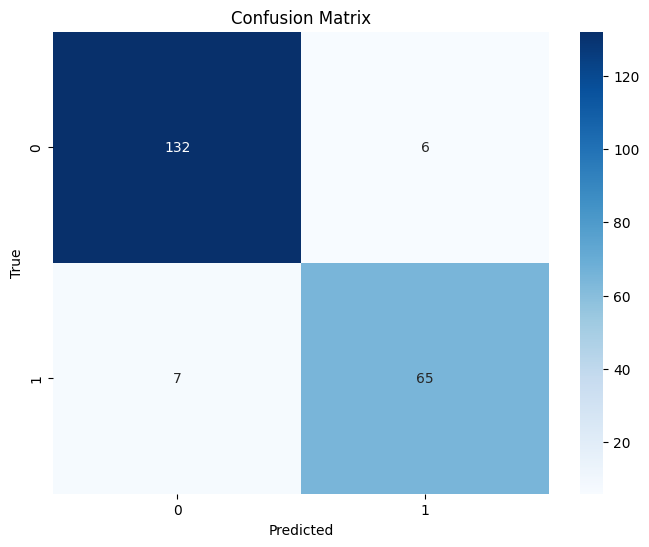

In [14]:
from sklearn.metrics import accuracy_score

predictions = pipe.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
y_predict = pipe.predict(X_test)

# Compute the confusion matrix
c_svm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(c_svm)

# Calculate accuracy
accuracy_svm = sum(np.diag(c_svm)) / np.sum(c_svm)
print("Accuracy:", accuracy_svm)

# Visualize the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(c_svm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Write metrics to a file
with open("Results/metrics.txt", "w") as outfile:
    outfile.write(f"\nAccuracy = {accuracy.round(2)}.")

FileNotFoundError: [Errno 2] No such file or directory: 'Results/model_results.png'

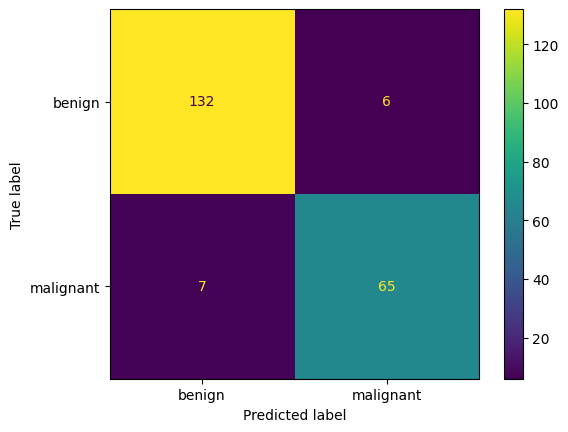

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_predict, labels=pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
disp.plot()
plt.savefig("Results/model_results.png", dpi=120)